In [1]:
from helper import *
!pip install plotly
%matplotlib inline

In [2]:
df_playlists = pd.read_csv('df_all_playlists.csv').drop(columns=['Unnamed: 0'])
df = pd.read_csv('df_holdout.csv').drop(columns=['Unnamed: 0'])
df_playlists_model_set = pd.read_csv('df_playlists_model_set.csv').drop(columns=['Unnamed: 0'])

In [3]:
df_playlists_model_set

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_datetime,release_year,playlist_names,happy,sad,angry,mood
0,5ZBeML7Lf3FMEVviTyvi8l,Twist And Shout - Remastered 2009,75.0,155227,0.0,The Beatles,['3WrFJ7ztbogyGnTHbHJFl2'],0.482,0.849,2,-9.198,1,0.0452,0.6410,0.000008,0.0414,0.937,124.631,4,1963-03-22,1963,"['happy_47', 'happy_40', 'happy_31']",3,0,0,happy
1,45s88Xopo6KvHc0PQ05aGg,My Generation - Mono Version,60.0,198867,0.0,The Who,['67ea9eGLXYMsO2eYQRui3w'],0.299,0.787,0,-7.930,0,0.0690,0.1400,0.000000,0.2920,0.716,94.798,4,1966-04-01,1966,"['happy_39', 'happy_31']",2,0,0,happy
2,7tqhbajSfrz2F7E1Z75ASX,Ain't No Mountain High Enough,82.0,151667,0.0,"Marvin Gaye, Tammi Terrell","['3koiLjNrgRTNbOwViDipeA', '75jNCko3SnEMI5gwGqrbb8']",0.663,0.600,7,-10.870,1,0.0320,0.4300,0.000000,0.1840,0.800,129.991,4,1967-08-29,1967,"['happy_28', 'happy_25']",2,0,0,happy
3,3yrSvpt2l1xhsV9Em88Pul,Brown Eyed Girl,80.0,183307,0.0,Van Morrison,['44NX2ffIYHr6D4n7RaZF7A'],0.491,0.583,7,-10.964,1,0.0376,0.1820,0.000000,0.4070,0.907,150.572,4,1967-09-01,1967,"['happy_29', 'happy_21']",2,0,0,happy
4,6dGnYIeXmHdcikdzNNDMm2,Here Comes The Sun - Remastered 2009,83.0,185733,0.0,The Beatles,['3WrFJ7ztbogyGnTHbHJFl2'],0.557,0.540,9,-10.484,1,0.0347,0.0339,0.002480,0.1790,0.394,129.171,4,1969-09-26,1969,"['happy_41', 'happy_40', 'happy_32', 'happy_20', 'happy_15']",5,0,0,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,4xv8q7odO8UiQjpxThZJrf,We Will Always Be,34.0,155656,0.0,"['Nate VanDeusen', 'Horizon Blue']",0,0.717,0.830,0,-7.137,1,0.0811,0.7610,0.000017,0.4010,0.434,121.969,4,2020-07-10,2020,"['happy_14', 'happy_10']",2,0,0,happy
1931,2FczCis9Te3whIdtkR3fBV,Please Don't Say You Love Me - Piano Version,41.0,221627,0.0,['Gabrielle Aplin'],0,0.424,0.183,2,-12.600,1,0.0379,0.9430,0.000001,0.1640,0.401,125.880,4,2013-02-08,2013,"['sad_50', 'sad_19']",0,2,0,sad
1932,2usxQITOSDqvkYiI0oIwao,You should be sad,1.0,205473,1.0,['Halsey'],0,0.591,0.585,2,-6.350,1,0.0277,0.1430,0.000000,0.1090,0.324,110.940,4,2020-01-10,2020,"['angry_24', 'angry_23', 'angry_7']",0,0,3,angry
1933,6nzhhT57iQYrbqumru9NNP,ABC,0.0,179973,0.0,['The Jackson 5'],0,0.559,0.752,8,-10.046,1,0.0581,0.4480,0.000610,0.0907,0.946,187.712,4,1995-01-01,1995,"['happy_40', 'happy_37']",2,0,0,happy


### Scaling Data

In [4]:
ss = StandardScaler()


df_playlists_model_set[['duration_ms', 'popularity', 'loudness', 'tempo']] = ss.fit_transform(df_playlists_model_set[['duration_ms', 'popularity', 'loudness', 'tempo']])

In [5]:
df_playlists_model_set

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_datetime,release_year,playlist_names,happy,sad,angry,mood
0,5ZBeML7Lf3FMEVviTyvi8l,Twist And Shout - Remastered 2009,0.538723,-1.283814,0.0,The Beatles,['3WrFJ7ztbogyGnTHbHJFl2'],0.482,0.849,2,-0.717988,1,0.0452,0.6410,0.000008,0.0414,0.937,0.178037,4,1963-03-22,1963,"['happy_47', 'happy_40', 'happy_31']",3,0,0,happy
1,45s88Xopo6KvHc0PQ05aGg,My Generation - Mono Version,-0.083573,-0.270533,0.0,The Who,['67ea9eGLXYMsO2eYQRui3w'],0.299,0.787,0,-0.335690,0,0.0690,0.1400,0.000000,0.2920,0.716,-0.929951,4,1966-04-01,1966,"['happy_39', 'happy_31']",2,0,0,happy
2,7tqhbajSfrz2F7E1Z75ASX,Ain't No Mountain High Enough,0.829128,-1.366474,0.0,"Marvin Gaye, Tammi Terrell","['3koiLjNrgRTNbOwViDipeA', '75jNCko3SnEMI5gwGqrbb8']",0.663,0.600,7,-1.222092,1,0.0320,0.4300,0.000000,0.1840,0.800,0.377105,4,1967-08-29,1967,"['happy_28', 'happy_25']",2,0,0,happy
3,3yrSvpt2l1xhsV9Em88Pul,Brown Eyed Girl,0.746155,-0.631822,0.0,Van Morrison,['44NX2ffIYHr6D4n7RaZF7A'],0.491,0.583,7,-1.250433,1,0.0376,0.1820,0.000000,0.4070,0.907,1.141477,4,1967-09-01,1967,"['happy_29', 'happy_21']",2,0,0,happy
4,6dGnYIeXmHdcikdzNNDMm2,Here Comes The Sun - Remastered 2009,0.870615,-0.575493,0.0,The Beatles,['3WrFJ7ztbogyGnTHbHJFl2'],0.557,0.540,9,-1.105714,1,0.0347,0.0339,0.002480,0.1790,0.394,0.346651,4,1969-09-26,1969,"['happy_41', 'happy_40', 'happy_32', 'happy_20', 'happy_15']",5,0,0,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,4xv8q7odO8UiQjpxThZJrf,We Will Always Be,-1.162220,-1.273853,0.0,"['Nate VanDeusen', 'Horizon Blue']",0,0.717,0.830,0,-0.096602,1,0.0811,0.7610,0.000017,0.4010,0.434,0.079171,4,2020-07-10,2020,"['happy_14', 'happy_10']",2,0,0,happy
1931,2FczCis9Te3whIdtkR3fBV,Please Don't Say You Love Me - Piano Version,-0.871815,0.257933,0.0,['Gabrielle Aplin'],0,0.424,0.183,2,-1.743683,1,0.0379,0.9430,0.000001,0.1640,0.401,0.224424,4,2013-02-08,2013,"['sad_50', 'sad_19']",0,2,0,sad
1932,2usxQITOSDqvkYiI0oIwao,You should be sad,-2.531272,-0.117148,1.0,['Halsey'],0,0.591,0.585,2,0.140676,1,0.0277,0.1430,0.000000,0.1090,0.324,-0.330442,4,2020-01-10,2020,"['angry_24', 'angry_23', 'angry_7']",0,0,3,angry
1933,6nzhhT57iQYrbqumru9NNP,ABC,-2.572759,-0.709235,0.0,['The Jackson 5'],0,0.559,0.752,8,-0.973658,1,0.0581,0.4480,0.000610,0.0907,0.946,2.520844,4,1995-01-01,1995,"['happy_40', 'happy_37']",2,0,0,happy


### Dummy Data

In [6]:
explicit = pd.get_dummies(df_playlists_model_set['explicit'], prefix='explicit')

df_playlists_model_set = pd.concat([df_playlists_model_set, explicit], axis=1)

In [7]:
mode = pd.get_dummies(df_playlists_model_set['mode'], prefix='mode')

df_playlists_model_set = pd.concat([df_playlists_model_set, mode], axis=1)

In [8]:
key = pd.get_dummies(df_playlists_model_set['key'], prefix='key')

df_playlists_model_set = pd.concat([df_playlists_model_set, key], axis=1)

In [9]:
time_sig = pd.get_dummies(df_playlists_model_set['time_signature'], prefix='time_sig')

df_playlists_model_set = pd.concat([df_playlists_model_set, time_sig], axis=1)

In [10]:
df_playlists_model_set

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_datetime,release_year,playlist_names,happy,sad,angry,mood,explicit_0.0,explicit_1.0,mode_0,mode_1,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,time_sig_1,time_sig_3,time_sig_4,time_sig_5
0,5ZBeML7Lf3FMEVviTyvi8l,Twist And Shout - Remastered 2009,0.538723,-1.283814,0.0,The Beatles,['3WrFJ7ztbogyGnTHbHJFl2'],0.482,0.849,2,-0.717988,1,0.0452,0.6410,0.000008,0.0414,0.937,0.178037,4,1963-03-22,1963,"['happy_47', 'happy_40', 'happy_31']",3,0,0,happy,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,45s88Xopo6KvHc0PQ05aGg,My Generation - Mono Version,-0.083573,-0.270533,0.0,The Who,['67ea9eGLXYMsO2eYQRui3w'],0.299,0.787,0,-0.335690,0,0.0690,0.1400,0.000000,0.2920,0.716,-0.929951,4,1966-04-01,1966,"['happy_39', 'happy_31']",2,0,0,happy,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,7tqhbajSfrz2F7E1Z75ASX,Ain't No Mountain High Enough,0.829128,-1.366474,0.0,"Marvin Gaye, Tammi Terrell","['3koiLjNrgRTNbOwViDipeA', '75jNCko3SnEMI5gwGqrbb8']",0.663,0.600,7,-1.222092,1,0.0320,0.4300,0.000000,0.1840,0.800,0.377105,4,1967-08-29,1967,"['happy_28', 'happy_25']",2,0,0,happy,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,3yrSvpt2l1xhsV9Em88Pul,Brown Eyed Girl,0.746155,-0.631822,0.0,Van Morrison,['44NX2ffIYHr6D4n7RaZF7A'],0.491,0.583,7,-1.250433,1,0.0376,0.1820,0.000000,0.4070,0.907,1.141477,4,1967-09-01,1967,"['happy_29', 'happy_21']",2,0,0,happy,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,6dGnYIeXmHdcikdzNNDMm2,Here Comes The Sun - Remastered 2009,0.870615,-0.575493,0.0,The Beatles,['3WrFJ7ztbogyGnTHbHJFl2'],0.557,0.540,9,-1.105714,1,0.0347,0.0339,0.002480,0.1790,0.394,0.346651,4,1969-09-26,1969,"['happy_41', 'happy_40', 'happy_32', 'happy_20', 'happy_15']",5,0,0,happy,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,4xv8q7odO8UiQjpxThZJrf,We Will Always Be,-1.162220,-1.273853,0.0,"['Nate VanDeusen', 'Horizon Blue']",0,0.717,0.830,0,-0.096602,1,0.0811,0.7610,0.000017,0.4010,0.434,0.079171,4,2020-07-10,2020,"['happy_14', 'happy_10']",2,0,0,happy,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1931,2FczCis9Te3whIdtkR3fBV,Please Don't Say You Love Me - Piano Version,-0.871815,0.257933,0.0,['Gabrielle Aplin'],0,0.424,0.183,2,-1.743683,1,0.0379,0.9430,0.000001,0.1640,0.401,0.224424,4,2013-02-08,2013,"['sad_50', 'sad_19']",0,2,0,sad,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1932,2usxQITOSDqvkYiI0oIwao,You should be sad,-2.531272,-0.117148,1.0,['Halsey'],0,0.591,0.585,2,0.140676,1,0.0277,0.1430,0.000000,0.1090,0.324,-0.330442,4,2020-01-10,2020,"['angry_24', 'angry_23', 'angry_7']",0,0,3,angry,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1933,6nzhhT57iQYrbqumru9NNP,ABC,-2.572759,-0.709235,0.0,['The Jackson 5'],0,0.559,0.752,8,-0.973658,1,0.0581,0.4480,0.000610,0.0907,0.946,2.520844,4,1995-01-01,1995,"['happy_40', 'happy_37']",2,0,0,happy,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


### Correlation Graph

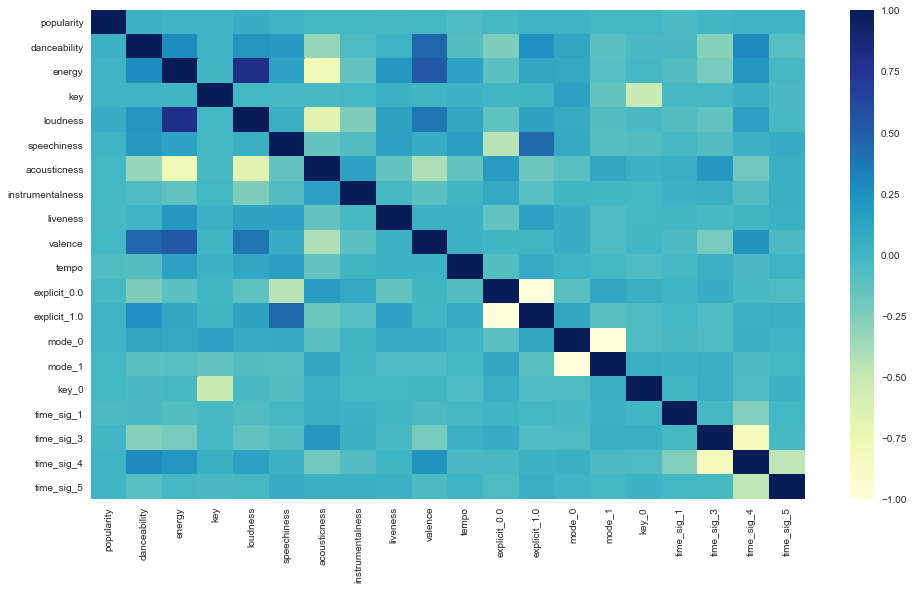

In [11]:
fig, ax = plt.subplots(figsize=(16,9))
sns.heatmap(df_playlists_model_set.drop(columns=['explicit', 'mode', 'happy','sad','angry','playlist_names', 'release_year', 'release_datetime','duration_ms','key_1','key_2','key_3','key_4','key_5','key_6','key_7','key_8','key_9','key_10','key_11', 'time_signature']).corr(),cmap="YlGnBu");

### Cleaning up final table for training

In [12]:
X = df_playlists_model_set.drop(columns=['id', 'name', 'explicit', 'artists', 'id_artists', 'key', 'mode', 'time_signature', 'release_datetime', 'release_year', 'playlist_names', 'happy', 'sad', 'angry', 'mood'])

In [13]:
y = df_playlists_model_set['mood']

In [14]:
y

0       happy
1       happy
2       happy
3       happy
4       happy
        ...  
1930    happy
1931      sad
1932    angry
1933    happy
1934      sad
Name: mood, Length: 1935, dtype: object

### Model 1 - Random Forest

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [16]:
rfc = RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=1000, class_weight='balanced')

In [17]:
params_grid = {
    'criterion' : ['gini','entropy'],
    'max_depth':[None, 5,3],
    'min_samples_split':[2,10,20],
    'n_estimators': [100,1000,5000]
}
gridsearch_model = GridSearchCV(estimator=rfc,param_grid = params_grid,verbose=1,n_jobs=-1)

In [18]:
gridsearch_model.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              n_estimators=1000, n_jobs=-1,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 3],
                         'min_samples_split': [2, 10, 20],
                         'n_estimators': [100, 1000, 5000]},
             verbose=1)

In [19]:
best_model_rf = gridsearch_model.best_estimator_

In [20]:
gridsearch_model.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_split': 2,
 'n_estimators': 100}

In [21]:
best_model_rf

RandomForestClassifier(class_weight='balanced', criterion='entropy', n_jobs=-1,
                       random_state=42)

In [22]:
y_pred_rf = best_model_rf.predict(X_test)

In [23]:
y_preds_rf = pd.Series(y_pred_rf)

In [24]:
f1_score(y_preds_rf,y_test,average='weighted')

0.8162786804574611

In [25]:
cf_matrix = confusion_matrix(y_test, y_preds_rf)

In [26]:
y_preds_rf.value_counts()

happy    227
sad      138
angry    119
dtype: int64

In [27]:
y_test.value_counts()

happy    192
angry    154
sad      138
Name: mood, dtype: int64

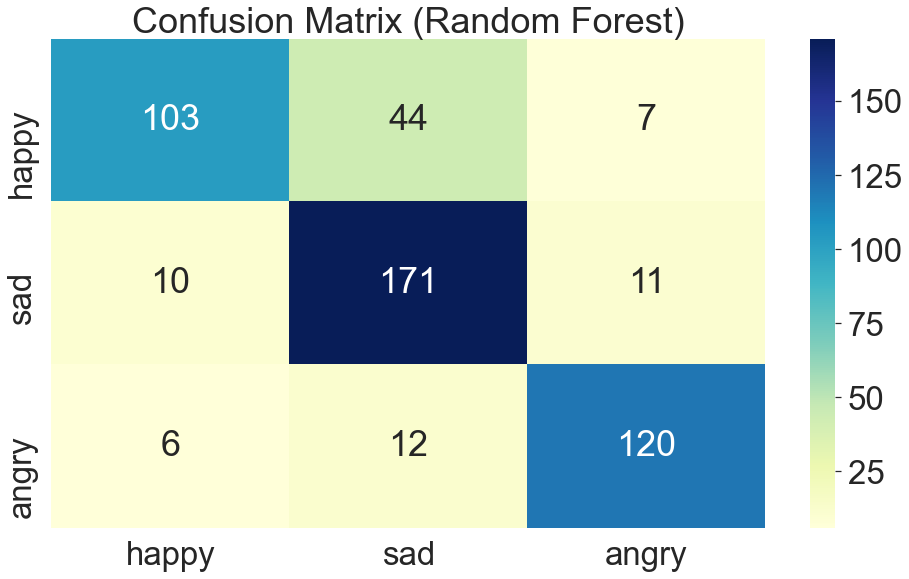

In [87]:
fig, ax = plt.subplots(figsize=(16,9))
sns.heatmap(cf_matrix, annot=True, cmap="YlGnBu", fmt='g', 
            xticklabels=['happy', 'sad', 'angry'], 
            yticklabels=['happy', 'sad', 'angry'])
sns.set(font_scale=3)
ax.set_title('Confusion Matrix (Random Forest)');

### Model 2 - KNN 

In [29]:
knn = KNeighborsClassifier(n_jobs=-1)

In [30]:
params_grid = {
    'n_neighbors':[3,5,11,19],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}
gridsearch_model = GridSearchCV(estimator=knn,param_grid = params_grid,verbose=1,cv=3, n_jobs=-1)

In [31]:
gridsearch_model.fit(X_train,y_train)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [32]:
best_model_knn = gridsearch_model.best_estimator_


In [33]:
gridsearch_model.best_params_


{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}

In [34]:
best_model_knn


KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=19,
                     weights='distance')

In [35]:
y_pred_knn = best_model_knn.predict(X_test)


In [36]:
y_preds_knn = pd.Series(y_pred_knn)


In [37]:
f1_score(y_preds_knn,y_test,average='weighted')


0.7853051657732771

In [38]:
cf_matrix_knn = confusion_matrix(y_test, y_preds_knn)

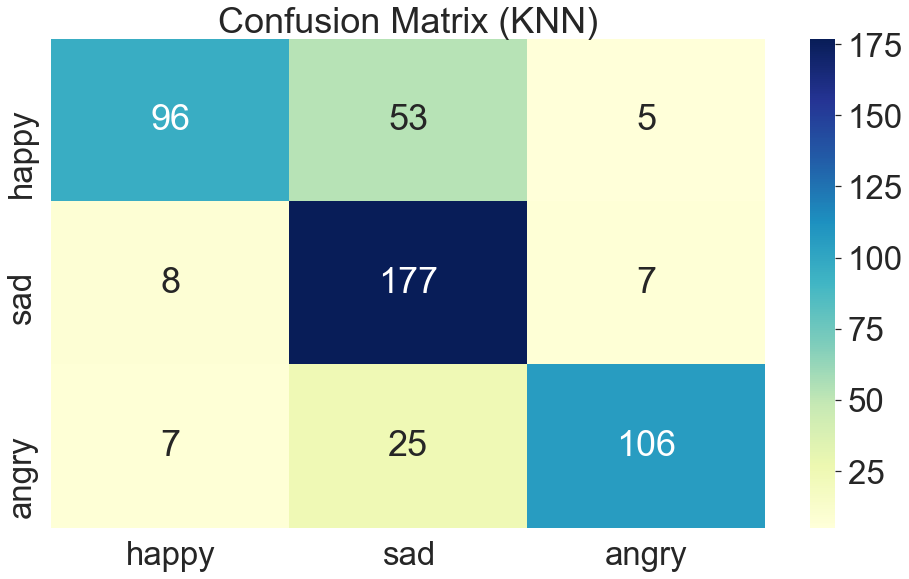

In [86]:
fig, ax = plt.subplots(figsize=(16,9))
sns.heatmap(cf_matrix_knn, annot=True, cmap="YlGnBu", fmt='g', 
            xticklabels=['happy', 'sad', 'angry'], 
            yticklabels=['happy', 'sad', 'angry'])
sns.set(font_scale=3)
ax.set_title('Confusion Matrix (KNN)');

### Predictions

#### Adding Dummy Data & Scaling Data

In [40]:
df[['duration_ms', 'popularity', 'loudness', 'tempo']] = ss.fit_transform(df[['duration_ms', 'popularity', 'loudness', 'tempo']])

In [41]:
df

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_datetime,release_year,playlist_names
0,35iwgR4jXetI318WEWsa1Q,Carve,-1.177038,-0.813545,0.0,Uli,['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-0.610157,1,0.4510,0.674,0.744000,0.1510,0.127,-0.456599,3,1922-02-22,1922,0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,-1.508869,-1.039750,0.0,Fernando Pessoa,['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-2.338143,1,0.9570,0.797,0.000000,0.1480,0.655,-0.552045,1,1922-06-01,1922,0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,-1.508869,-0.382168,0.0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-2.150378,1,0.0512,0.994,0.021800,0.2120,0.457,0.402050,5,1922-03-21,1922,0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,-1.508869,-0.419469,0.0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-3.482211,1,0.0504,0.995,0.918000,0.1040,0.397,1.730712,3,1922-03-21,1922,0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,-1.508869,-0.528438,0.0,Dick Haymes,['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-1.309758,0,0.0390,0.989,0.130000,0.3110,0.196,-0.511375,4,1922-01-01,1922,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582701,1ZwZsVZUiyFwIHMNpI3ERt,Skyscraper,-1.287648,-0.978263,0.0,Emilie Chin,['4USdOnfLczwUglA3TrdHs2'],0.626,0.5300,5,-0.566751,0,0.0284,0.113,0.856000,0.1040,0.215,0.055964,4,2020-02-08,2020,0
582702,5rgu12WBIHQtvej2MdHSH0,云与海,1.256390,0.221721,0.0,阿YueYue,['1QLBXKM5GCpyQQSVMNZqrZ'],0.560,0.5180,0,0.542161,0,0.0292,0.785,0.000000,0.0648,0.211,0.451688,4,2020-09-26,2020,0
582703,0NuWgxEp51CutD2pJoF4OM,blind,2.473104,-0.605568,0.0,ROLE MODEL,['1dy5WNgIKQU6ezkpZs4y8z'],0.765,0.6630,0,0.983683,1,0.0652,0.141,0.000297,0.0924,0.686,1.062754,4,2020-10-21,2020,0
582704,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,1.698832,-0.694543,0.0,"Gentle Bones, Clara Benin","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2gkqjn']",0.696,0.6150,10,0.789436,1,0.0345,0.206,0.000003,0.3050,0.438,-0.954385,4,2021-03-05,2021,0


In [42]:
explicit = pd.get_dummies(df['explicit'], prefix='explicit')

df = pd.concat([df, explicit], axis=1)

In [43]:
mode = pd.get_dummies(df['mode'], prefix='mode')

df = pd.concat([df, mode], axis=1)

In [44]:
key = pd.get_dummies(df['key'], prefix='key')

df = pd.concat([df, key], axis=1)

In [45]:
time_sig = pd.get_dummies(df['time_signature'], prefix='time_sig')

df = pd.concat([df, time_sig], axis=1)

In [46]:
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_datetime,release_year,playlist_names,explicit_0.0,explicit_1.0,mode_0,mode_1,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,time_sig_0,time_sig_1,time_sig_3,time_sig_4,time_sig_5
0,35iwgR4jXetI318WEWsa1Q,Carve,-1.177038,-0.813545,0.0,Uli,['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-0.610157,1,0.4510,0.674,0.7440,0.151,0.127,-0.456599,3,1922-02-22,1922,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,-1.508869,-1.039750,0.0,Fernando Pessoa,['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-2.338143,1,0.9570,0.797,0.0000,0.148,0.655,-0.552045,1,1922-06-01,1922,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,-1.508869,-0.382168,0.0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-2.150378,1,0.0512,0.994,0.0218,0.212,0.457,0.402050,5,1922-03-21,1922,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,-1.508869,-0.419469,0.0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-3.482211,1,0.0504,0.995,0.9180,0.104,0.397,1.730712,3,1922-03-21,1922,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,-1.508869,-0.528438,0.0,Dick Haymes,['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-1.309758,0,0.0390,0.989,0.1300,0.311,0.196,-0.511375,4,1922-01-01,1922,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [47]:
pred_X = df.drop(columns=['id', 'name', 'explicit', 'artists', 'id_artists', 'key', 'mode', 'time_signature', 'release_datetime', 'release_year', 'playlist_names', 'time_sig_0'])

In [48]:
pred_X

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,explicit_0.0,explicit_1.0,mode_0,mode_1,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,time_sig_1,time_sig_3,time_sig_4,time_sig_5
0,-1.177038,-0.813545,0.645,0.4450,-0.610157,0.4510,0.674,0.744000,0.1510,0.127,-0.456599,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,-1.508869,-1.039750,0.695,0.2630,-2.338143,0.9570,0.797,0.000000,0.1480,0.655,-0.552045,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,-1.508869,-0.382168,0.434,0.1770,-2.150378,0.0512,0.994,0.021800,0.2120,0.457,0.402050,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,-1.508869,-0.419469,0.321,0.0946,-3.482211,0.0504,0.995,0.918000,0.1040,0.397,1.730712,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,-1.508869,-0.528438,0.402,0.1580,-1.309758,0.0390,0.989,0.130000,0.3110,0.196,-0.511375,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582701,-1.287648,-0.978263,0.626,0.5300,-0.566751,0.0284,0.113,0.856000,0.1040,0.215,0.055964,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
582702,1.256390,0.221721,0.560,0.5180,0.542161,0.0292,0.785,0.000000,0.0648,0.211,0.451688,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
582703,2.473104,-0.605568,0.765,0.6630,0.983683,0.0652,0.141,0.000297,0.0924,0.686,1.062754,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
582704,1.698832,-0.694543,0.696,0.6150,0.789436,0.0345,0.206,0.000003,0.3050,0.438,-0.954385,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [49]:
X_train.columns

Index(['popularity', 'duration_ms', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'explicit_0.0', 'explicit_1.0', 'mode_0', 'mode_1',
       'key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7',
       'key_8', 'key_9', 'key_10', 'key_11', 'time_sig_1', 'time_sig_3',
       'time_sig_4', 'time_sig_5'],
      dtype='object')

In [50]:
pred_y_rf = best_model_rf.predict(pred_X)

In [51]:
pred_y_preds_rf = pd.Series(pred_y_rf)

In [52]:
df['mood'] = pred_y_preds_rf

In [53]:
df['mood'].value_counts()

sad      283815
happy    260856
angry     38035
Name: mood, dtype: int64

In [54]:
df = df.drop(columns=['playlist_names', 'explicit_0.0', 'explicit_1.0',
       'mode_0', 'mode_1', 'key_0', 'key_1', 'key_2', 'key_3', 'key_4',
       'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11',
       'time_sig_0', 'time_sig_1', 'time_sig_3', 'time_sig_4', 'time_sig_5'])

In [55]:
df_playlists_model_set = df_playlists_model_set.drop(columns=['playlist_names', 'happy', 'sad', 'angry','explicit_0.0', 'explicit_1.0', 'mode_0', 'mode_1', 'key_0', 'key_1',
       'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9',
       'key_10', 'key_11', 'time_sig_1', 'time_sig_3', 'time_sig_4',
       'time_sig_5' ])

In [56]:
pd.concat([df, df_playlists_model_set], axis=0).to_csv('df_predictions.csv')

### Feature Selection

In [57]:
X_train

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,explicit_0.0,explicit_1.0,mode_0,mode_1,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,time_sig_1,time_sig_3,time_sig_4,time_sig_5
1823,-0.581410,-0.225210,0.319,0.203,-1.370429,0.0321,0.8710,0.000000,0.0811,0.287,-0.813035,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1345,0.206832,0.021702,0.613,0.739,0.102085,0.0311,0.5260,0.000000,0.1490,0.712,-0.552315,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1897,-0.125060,0.123541,0.851,0.702,0.797338,0.2680,0.0854,0.000000,0.3740,0.179,0.263792,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1828,-0.705870,0.335624,0.709,0.242,-0.709848,0.0297,0.6120,0.000044,0.0948,0.194,0.753293,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1877,-0.539924,-0.108186,0.383,0.446,-0.565732,0.0382,0.6300,0.000000,0.0946,0.213,-1.576144,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.414264,-1.033025,0.732,0.874,1.103056,0.0662,0.1680,0.000012,0.0489,0.905,0.116014,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1294,0.289805,-1.856885,0.593,0.229,-0.624524,0.0307,0.7940,0.000000,0.1670,0.420,-0.074810,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
860,0.538723,0.103131,0.637,0.723,0.382779,0.0910,0.0134,0.000079,0.1960,0.228,0.860738,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1459,-2.323840,0.829424,0.773,0.747,0.830804,0.0889,0.0239,0.000008,0.1100,0.800,0.229401,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [58]:
y_train_int = y_train.replace(['happy', 'sad', 'angry'], [1, 2,3])

In [75]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

selector = SelectKBest(f_regression, k=10)

selector.fit(X_train, y_train_int)

SelectKBest(score_func=<function f_regression at 0x000002046C7EECA0>)

In [76]:
selector.get_support()

array([ True,  True, False,  True, False,  True, False, False,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False])

In [77]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [78]:
list(selected_columns)

['popularity',
 'duration_ms',
 'energy',
 'speechiness',
 'liveness',
 'valence',
 'tempo',
 'explicit_0.0',
 'explicit_1.0',
 'key_10']